# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Insights



In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Creating Counters
record_count = 1
set_count = 1
city_data = []
#Iterate over each row
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#index, row in df.iterrows():
    #city = row['city']
    print("Processing Record %s of set %s | %s" %(record_count, set_count, city))
    record_count += 1
    #city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + city
    #print(url)
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        lon = weather['coord']['lon']
        country = weather['sys']['country']
        date = weather['dt']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_wind_speed = weather['wind']['speed']
        city_clouds = weather['clouds']['all']
        
        #Append city into city_info
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : city_humidity,
                      "Longitude" : lon,
                      "Latitude" : lat,
                      "Cloudiness" : city_clouds,
                      "Country" : country,
                      "Windspeed" : city_wind_speed,
                      "Date" : date
                      })
        
    except:
        print('city not found.Skipping...')
        pass
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of set 1 | trairi
Processing Record 2 of set 1 | clarence town
Processing Record 3 of set 1 | hilo
Processing Record 4 of set 1 | padang
Processing Record 5 of set 1 | butaritari
Processing Record 6 of set 1 | velyka bahachka
Processing Record 7 of set 1 | avarua
Processing Record 8 of set 1 | srednekolymsk
Processing Record 9 of set 1 | nanortalik
Processing Record 10 of set 1 | rikitea
Processing Record 11 of set 1 | provideniya
Processing Record 12 of set 1 | tevaitoa
Processing Record 13 of set 1 | chute-aux-outardes
Processing Record 14 of set 1 | bethel
Processing Record 15 of set 1 | pokaran
Processing Record 16 of set 1 | pilao arcado
city not found.Skipping...
Processing Record 17 of set 1 | atuona
Processing Record 18 of set 1 | ulladulla
Processing Record 19 of set 1 | puerto ayora
Processing Record 20 of set 1 | new norfolk
Processing Record 21 of set 1 | talnakh
Processing Record 22 of set 1 | saskylakh
Processing Record 23 of set 1 | shanghai
Processin

Processing Record 40 of set 4 | nikolskoye
Processing Record 41 of set 4 | leningradskiy
Processing Record 42 of set 4 | aflu
city not found.Skipping...
Processing Record 43 of set 4 | kamenskoye
city not found.Skipping...
Processing Record 44 of set 4 | uray
Processing Record 45 of set 4 | sibolga
Processing Record 46 of set 4 | chuy
Processing Record 47 of set 4 | hihifo
city not found.Skipping...
Processing Record 48 of set 4 | olawa
Processing Record 49 of set 4 | east london
Processing Record 0 of set 5 | pacifica
Processing Record 1 of set 5 | matagami
Processing Record 2 of set 5 | puerto carreno
Processing Record 3 of set 5 | maniitsoq
Processing Record 4 of set 5 | hawkesbury
Processing Record 5 of set 5 | menzelinsk
Processing Record 6 of set 5 | ponta delgada
Processing Record 7 of set 5 | kavaratti
Processing Record 8 of set 5 | tiznit
Processing Record 9 of set 5 | maceio
Processing Record 10 of set 5 | muros
Processing Record 11 of set 5 | bengkulu
Processing Record 12 of

Processing Record 30 of set 8 | sinkat
city not found.Skipping...
Processing Record 31 of set 8 | boa vista
Processing Record 32 of set 8 | yashkul
Processing Record 33 of set 8 | gold coast
Processing Record 34 of set 8 | saint-michel-des-saints
Processing Record 35 of set 8 | ambon
Processing Record 36 of set 8 | verkhnevilyuysk
Processing Record 37 of set 8 | kayanga
Processing Record 38 of set 8 | venado tuerto
Processing Record 39 of set 8 | khorinsk
Processing Record 40 of set 8 | huicungo
Processing Record 41 of set 8 | tambovka
Processing Record 42 of set 8 | ust-omchug
Processing Record 43 of set 8 | yar-sale
Processing Record 44 of set 8 | coos bay
Processing Record 45 of set 8 | matehuala
Processing Record 46 of set 8 | hofn
Processing Record 47 of set 8 | thinadhoo
Processing Record 48 of set 8 | alta floresta
Processing Record 49 of set 8 | petropavlovsk-kamchatskiy
Processing Record 0 of set 9 | qandala
Processing Record 1 of set 9 | sao paulo de olivenca
Processing Recor

Processing Record 19 of set 12 | general roca
Processing Record 20 of set 12 | tubinskiy
Processing Record 21 of set 12 | santa isabel do rio negro
Processing Record 22 of set 12 | kamachumu
Processing Record 23 of set 12 | doctor pedro p. pena
city not found.Skipping...
Processing Record 24 of set 12 | nisia floresta
Processing Record 25 of set 12 | yanaul
Processing Record 26 of set 12 | jalalpur pirwala
Processing Record 27 of set 12 | dunedin
Processing Record 28 of set 12 | bonavista
Processing Record 29 of set 12 | vestmanna
Processing Record 30 of set 12 | san juan
Processing Record 31 of set 12 | kumluca
Processing Record 32 of set 12 | whitehorse
Processing Record 33 of set 12 | portel
Processing Record 34 of set 12 | carauari
Processing Record 35 of set 12 | lleida
Processing Record 36 of set 12 | waren
Processing Record 37 of set 12 | tagusao
Processing Record 38 of set 12 | karratha
Processing Record 39 of set 12 | port macquarie
Processing Record 40 of set 12 | tvedestrand

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,trairi,298.52,87,-39.2689,-3.2778,90,BR,4.20,1613102612
1,clarence town,307.04,51,151.7833,-32.5833,0,AU,3.09,1613102612
2,hilo,298.15,61,-155.0900,19.7297,90,US,3.60,1613102537
3,padang,304.15,66,100.3543,-0.9492,20,ID,2.57,1613102606
4,butaritari,300.55,76,172.7902,3.0707,0,KI,5.28,1613102612


In [11]:
#Extract relevant fields from DataFrame
lat = city_data_pd["Latitude"]
city_max_temps = city_data_pd["Temperature"]
city_humidity = city_data_pd["Humidity"]
city_clouds = city_data_pd["Cloudiness"]
city_wind_speed = city_data_pd["Windspeed"]

In [12]:
#Export dataframe to CSV
city_data_pd.to_csv("cities.csv", encoding="utf-8", index=False)
city_data_pd.round()
city_data_pd.head()

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,trairi,298.52,87,-39.2689,-3.2778,90,BR,4.20,1613102612
1,clarence town,307.04,51,151.7833,-32.5833,0,AU,3.09,1613102612
2,hilo,298.15,61,-155.0900,19.7297,90,US,3.60,1613102537
3,padang,304.15,66,100.3543,-0.9492,20,ID,2.57,1613102606
4,butaritari,300.55,76,172.7902,3.0707,0,KI,5.28,1613102612


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

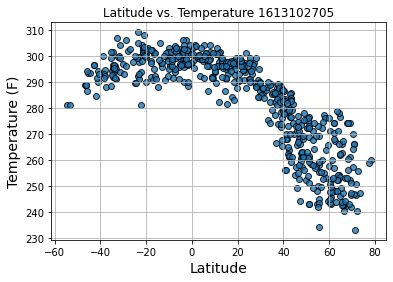

In [15]:
#sns.set()
#plt.figure(figsize=(10,8))
plt.scatter(lat, city_max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
plt.title(f"Latitude vs. Temperature {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Temperature (F)", fontsize="14")
plt.grid(True)
#plt.ylim(0, 120)

plt.savefig("Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

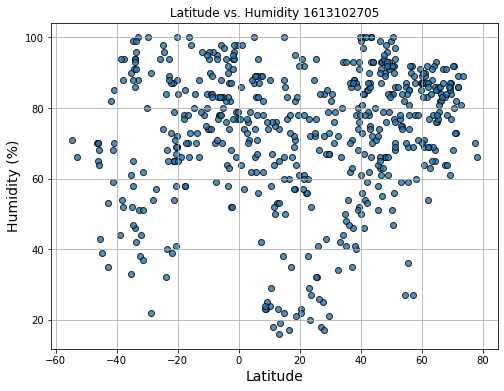

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(lat, city_humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")                              
plt.title(f"Latitude vs. Humidity {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")
plt.grid(True)
#plt.ylim(0,120)

plt.savefig("Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

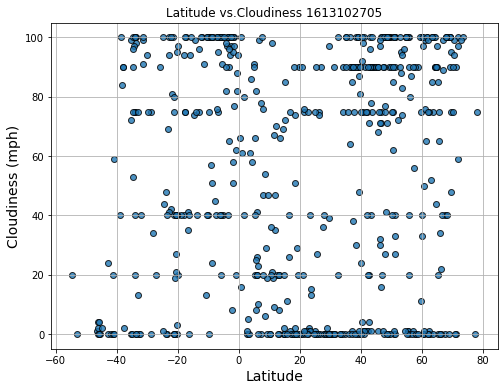

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(lat, city_clouds,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")                          
plt.title(f"Latitude vs.Cloudiness {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Cloudiness (mph)", fontsize="14")
plt.grid(True)
#plt.ylim(-20, 120)

plt.savefig("Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

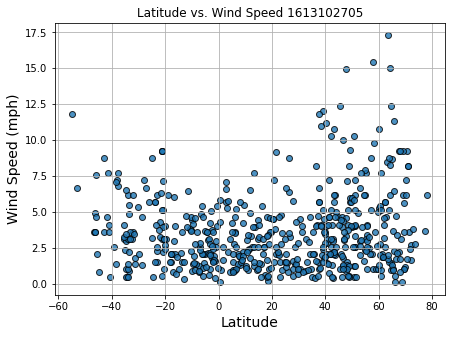

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(lat, city_wind_speed,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")                             
plt.title(f"Latitude vs. Wind Speed {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.grid(True)
#plt.ylim(-5,45)

plt.savefig("Wind_Speed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


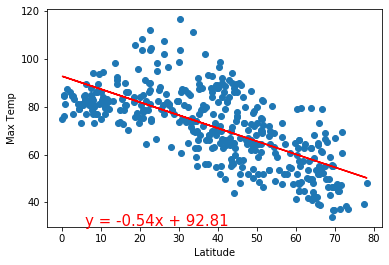

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


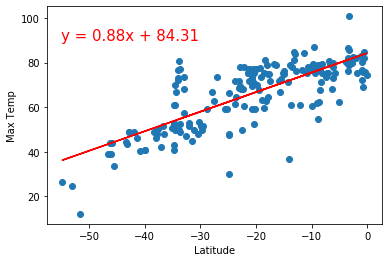

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


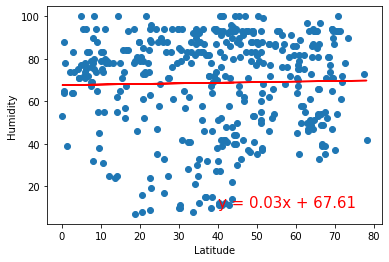

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


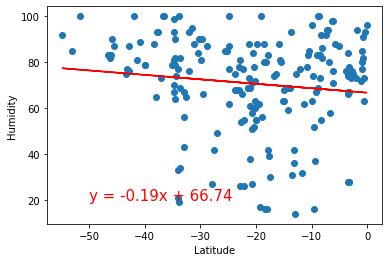

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


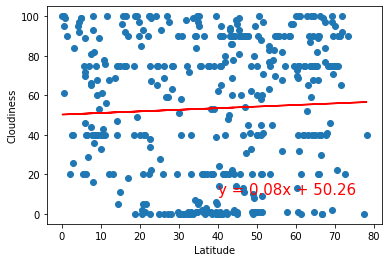

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


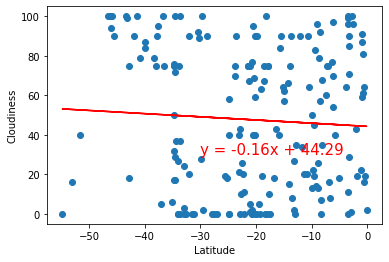

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


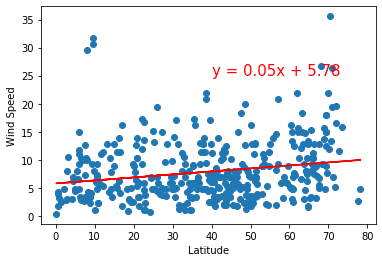

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


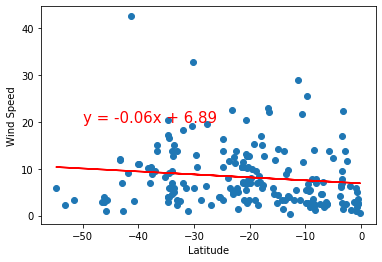